In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('Fraud_check.csv')
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [3]:
data.tail()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO
599,NO,Divorced,96519,158137,16,NO


In [4]:
data.shape

(600, 6)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [6]:
data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [7]:
data.nunique()

Undergrad            2
Marital.Status       3
Taxable.Income     599
City.Population    598
Work.Experience     31
Urban                2
dtype: int64

In [8]:
def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(40,6))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

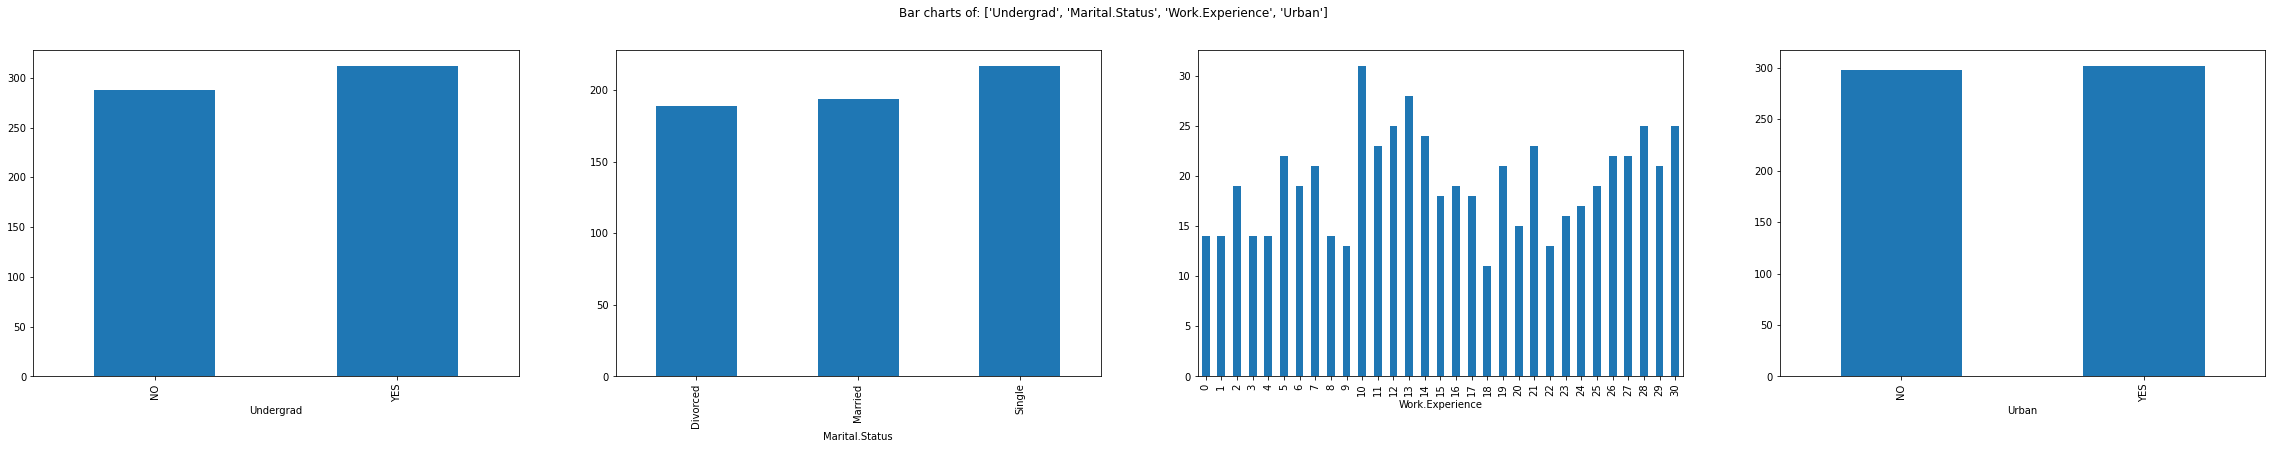

In [9]:
PlotBarCharts(inpData=data, 
              colsToPlot=['Undergrad', 'Marital.Status', 'Work.Experience','Urban'])

array([[<AxesSubplot:title={'center':'Taxable.Income'}>,
        <AxesSubplot:title={'center':'City.Population'}>],
       [<AxesSubplot:title={'center':'Work.Experience'}>, <AxesSubplot:>]],
      dtype=object)

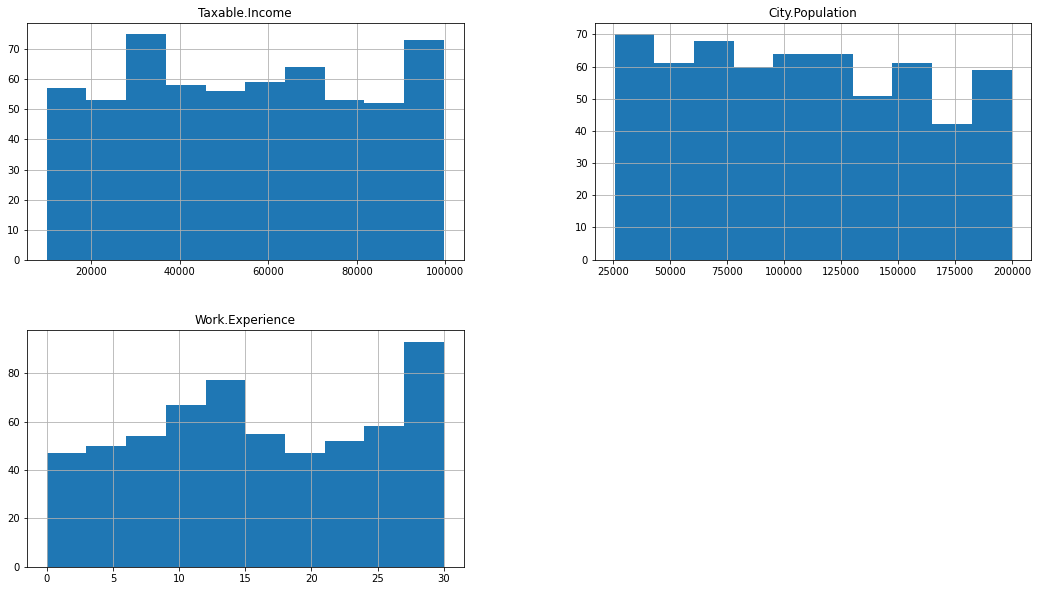

In [10]:
data.hist(['Taxable.Income', 'City.Population','Work.Experience'], figsize=(18,10))

In [11]:
data['Tax'] = np.where(data['Taxable.Income']<= 30000 ,'Risky', 'Good')

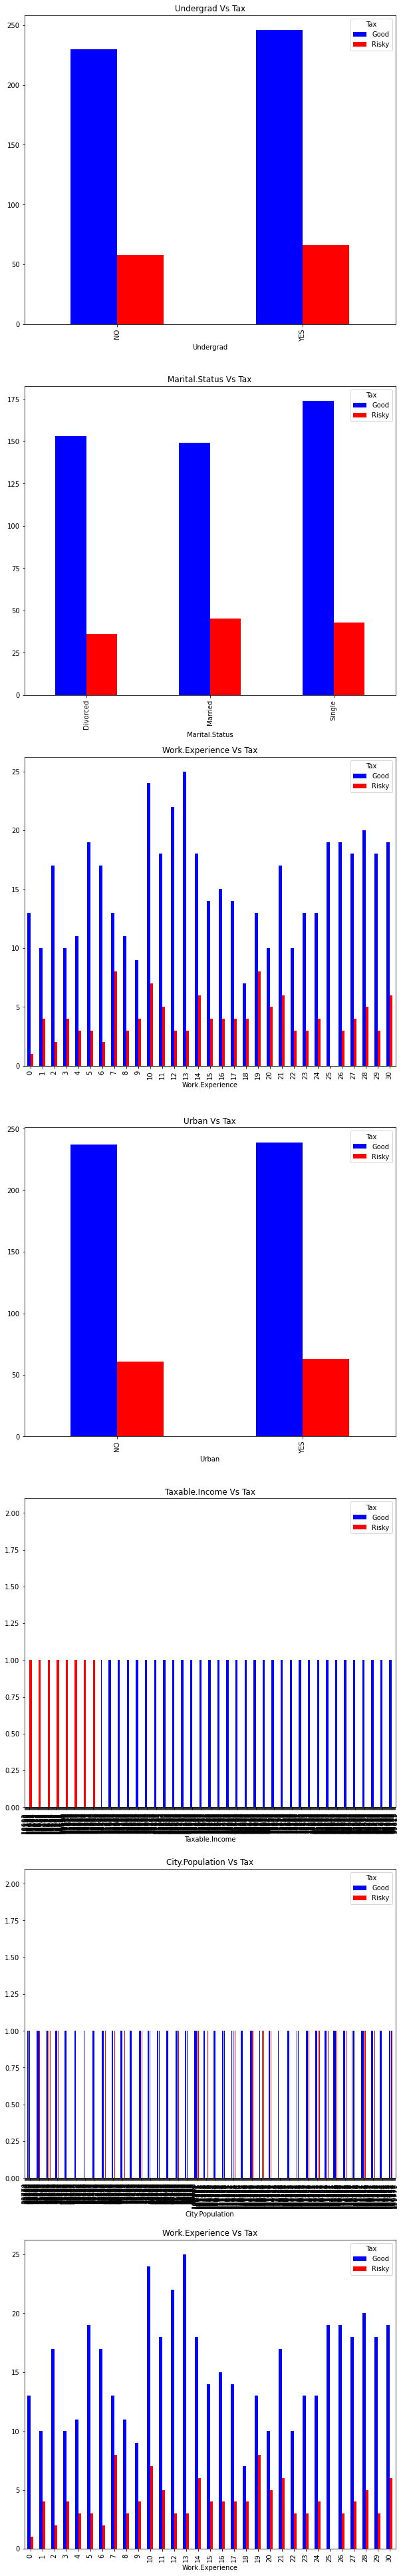

In [12]:
# Visual Inference using Grouped Bar charts
CategoricalColsList=['Undergrad', 'Marital.Status', 'Work.Experience','Urban',
                    'Taxable.Income', 'City.Population','Work.Experience']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=len(CategoricalColsList), ncols=1, figsize=(10,70))

# Creating Grouped bar plots for each categorical predictor against the Target Variable "SalaryGT50K"
for CategoricalCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    CrossTabResult=pd.crosstab(index=data[CategoricalCol], columns=data['Tax'])
    CrossTabResult.plot.bar(color=['blue','red'], ax=PlotCanvas[i], title=CategoricalCol+' Vs '+'Tax')

In [13]:
data['Urban'].replace({'YES':1, 'NO':0}, inplace=True)
data['Undergrad'].replace({'YES':1, 'NO':0}, inplace=True)
data['Tax'].replace({'Risky':1, 'Good':0}, inplace=True)
data['Marital.Status'].replace({'Single':1, 'Divorced':0,'Married':2}, inplace=True)
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Tax
0,0,1,68833,50047,10,1,0
1,1,0,33700,134075,18,1,0
2,0,2,36925,160205,30,1,0
3,1,1,50190,193264,15,1,0
4,0,2,81002,27533,28,0,0


In [14]:
X = data.drop('Tax', axis=1)
y = data['Tax']

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

In [17]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [18]:
X_train

array([[-1.03161048, -0.00823415,  0.37144707, -0.16889878, -1.41421198,
        -1.00892875],
       [-1.03161048,  1.22688817,  0.82470395, -0.50188197, -0.85360998,
         0.99115027],
       [ 0.96935812, -0.00823415,  0.48491349, -0.67934736,  0.04335322,
        -1.00892875],
       ...,
       [-1.03161048,  1.22688817,  0.1459221 ,  1.45118979,  1.27667762,
        -1.00892875],
       [ 0.96935812, -1.24335647,  1.21449269,  0.95255602, -0.51724878,
        -1.00892875],
       [-1.03161048,  1.22688817, -1.56318966, -0.13515665, -1.30209158,
         0.99115027]])

In [19]:
from sklearn.ensemble import RandomForestRegressor 
# Choose various values of max_depth, n_estimators and criterion for tuning the model
clf = RandomForestRegressor(max_depth=10, n_estimators=100)
# Creating the model on Training Data
RF=clf.fit(X_train,y_train)
y_pred=RF.predict(X_test)
pd.crosstab(y_test, y_pred, rownames=['Actual Result'], colnames=['Predicted Result'])

Predicted Result,0.0,1.0
Actual Result,,
0,118,0
1,0,32


In [20]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0


In [21]:
from sklearn.ensemble import RandomForestClassifier 
# Choose various values of max_depth, n_estimators and criterion for tuning the model
clf = RandomForestClassifier(max_depth=10, n_estimators=100)
# Creating the model on Training Data
RFC=clf.fit(X_train,y_train)
y_pred=RFC.predict(X_test)

In [22]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[118   0]
 [  0  32]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       118
           1       1.00      1.00      1.00        32

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150

1.0



Accuracy values for 10-fold Cross Validation:
 [nan  1. nan  1. nan]

Final Average Accuracy of the model: nan


<AxesSubplot:>

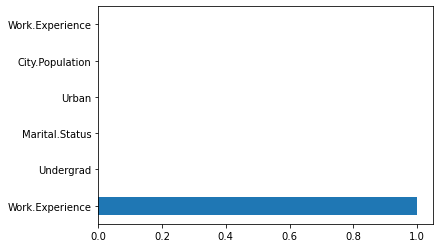

In [23]:
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RF, X , y, cv=5, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=['Undergrad', 'Marital.Status', 'Work.Experience','Urban',
                     'City.Population','Work.Experience'])
feature_importances.nlargest(10).plot(kind='barh')

In [24]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Choosing Decision Tree with 1 level as the weak learner
# Choose different values of max_depth, n_estimators and learning_rate to tune the model
DTC=DecisionTreeClassifier(max_depth=4)
clf = AdaBoostClassifier(n_estimators=200, base_estimator=DTC ,learning_rate=0.01)

# Printing all the parameters of Adaboost
print(clf)

# Creating the model on Training Data
AB=clf.fit(X_train,y_train)
prediction=AB.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=4),
                   learning_rate=0.01, n_estimators=200)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       118
           1       1.00      1.00      1.00        32

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150

[[118   0]
 [  0  32]]
Accuracy of the model on Testing Sample Data: 1.0



Accuracy values for 10-fold Cross Validation:
 [1.         0.99172632 1.         1.         1.        ]

Final Average Accuracy of the model: 1.0


<AxesSubplot:>

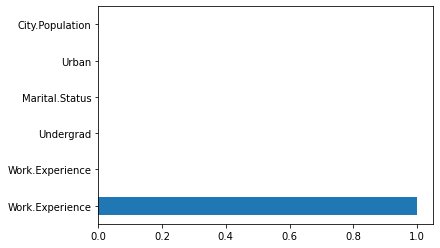

In [25]:
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(AB, X , y, cv=5, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=['Undergrad', 'Marital.Status', 'Work.Experience','Urban',
                     'City.Population','Work.Experience'])
feature_importances.nlargest(10).plot(kind='barh')